In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from PIL import Image

In [2]:
fn = 'ctf.png'
im = Image.open(fn)
im.size, im.mode

((826, 620), 'RGB')

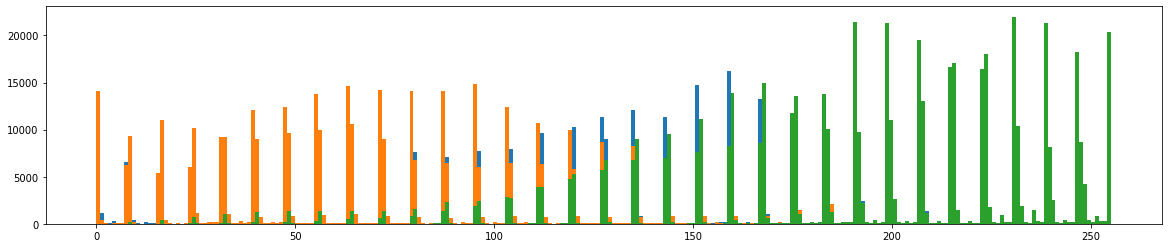

In [3]:
xs = np.array(im)
plt.figure(figsize=(20, 4))
_ = plt.hist(xs[:,:,1].ravel(), bins=256)
_ = plt.hist(xs[:,:,2].ravel(), bins=256)
_ = plt.hist(xs[:,:,0].ravel(), bins=256)

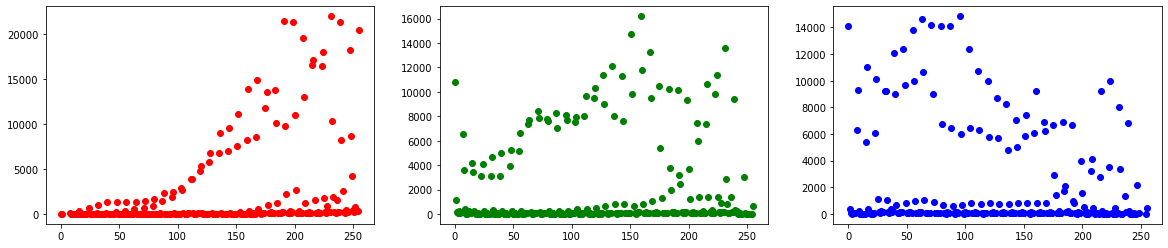

In [4]:
r,g,b = [Counter(xs[:,:,i].ravel()) for i in range(3)]
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
x, y = zip(*r.most_common())
_ = plt.scatter(x, y, color='red')
plt.subplot(1, 3, 2)
x, y = zip(*g.most_common())
_ = plt.scatter(x, y, color='green')
plt.subplot(1, 3, 3)
x, y = zip(*b.most_common())
_ = plt.scatter(x, y, color='blue')

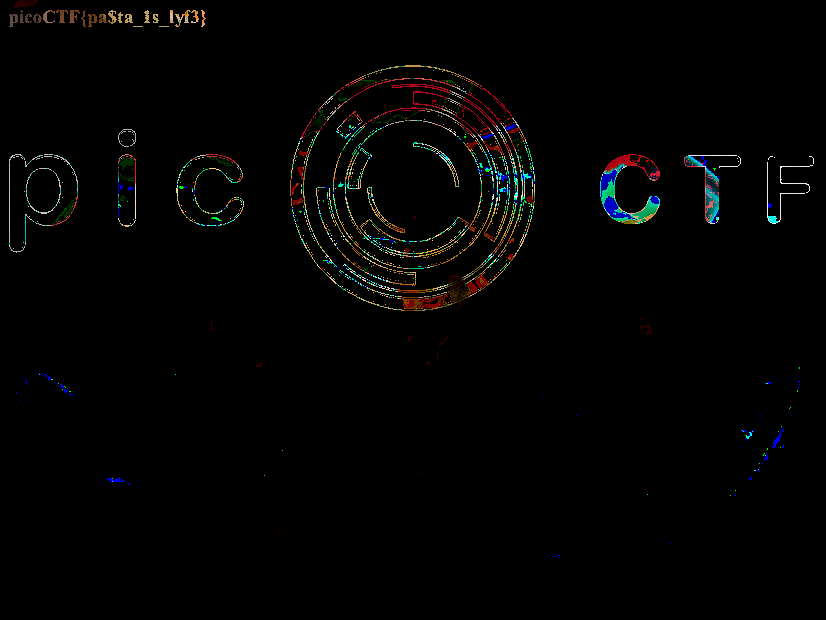

In [5]:
xs = np.array(im)
t = 256
r,g,b = [Counter(xs[:,:,i].ravel()) for i in range(3)]
rx = [x if r[x] < t else 0 for x in xs[:,:,0].ravel()]
gx = [x if g[x] < t else 0 for x in xs[:,:,1].ravel()]
bx = [x if b[x] < t else 0 for x in xs[:,:,2].ravel()]
rx = np.array(rx, dtype=np.uint8).reshape(xs.shape[:2])
gx = np.array(gx, dtype=np.uint8).reshape(xs.shape[:2])
bx = np.array(bx, dtype=np.uint8).reshape(xs.shape[:2])
ys = np.stack((rx, gx, bx), axis=2)
Image.fromarray(ys, mode='RGB')